# Gradiente descendente

El gradiente descendente es un algoritmo fundamental en las funciones de aprendizaje. Su objetivo es aproximar las salidas estimadas a las salidas reales con el menor error posible. Aunque se utiliza ampliamente en redes neuronales y resulta una base del aprendizaje profundo (*deep learning*), también se implementa en modelos clásicos de clasificación e incluso en regresiones lineales. 

## Funciones de Coste

La función de coste $J$ corresponde a la función que queremos optimizar, por ejemplo, en el caso de una regresión lineal esta función puede ser el error cuadrático medio *(MSE - Mean Squared Error)* en ese caso:

$$
J=MSE=\cfrac{1}{M}\sum_{i=1}^{M}(X^{\text{real}}_i-X^{\text{est}}_i)^2
$$



No siempre encontraremos un valor mínimo ni contamos con métodos analíticos para optimizar dichas funciones, en ocasiones debemos aproximarnos a esos valores óptimos. En el caso de el gradiente descendente, buscamos el gradiente $(\partial J/\partial W)$ de la función de coste respecto a cada uno de los parámetros y tomamos esa dirección como referencia, pues hay un teorema de cálculo vectorial que nos indica que $(\partial J/\partial W)$ es la dirección en la que más crece la función y $-(\partial J/\partial W)$ es la dirección en la que más decrece.

La idea es iterar atraves del gradiente para aproximarnos cada vez más al mínimo:

Usamos samples generator para hacer una regresión:

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_regression
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2,
                         random_state=1100, noise=4)
x1 = X[:,0]
x2 = X[:,1]
df = pd.DataFrame({'x1': x1, 
                   'x2': x2,
                   'y': y})
df = df[['x1', 'x2', 'y']]

df.head(10)

,x1,x2,y
0,-1.890,0.652,-108.914
1,-0.136,0.004,-11.692
2,-0.321,1.945,93.798
3,-1.556,-1.058,-191.374
4,-0.126,-0.857,-67.023
5,-0.438,0.656,12.404
6,-1.503,0.915,-56.916
7,0.427,2.663,204.556
8,-0.029,1.052,58.531
9,0.576,-1.132,-29.296


Hacemos una estimación mala:

In [3]:
df.loc[:,'y_gorro'] = 2*df['x1'] + 0*df['x2']
df.head(5) # solo mostramos las 5 primeras filas para no sobrecargar el display.

,x1,x2,y,y_gorro
0,-1.890,0.652,-108.914,-3.779
1,-0.136,0.004,-11.692,-0.271
2,-0.321,1.945,93.798,-0.642
3,-1.556,-1.058,-191.374,-3.112
4,-0.126,-0.857,-67.023,-0.253


Ahora la mejoraremos, pensemos en los MSE:

In [4]:
residuos = (df['y']- df['y_gorro'])**2
pd.DataFrame(residuos, columns = ['Residuo']).head(9)

,Residuo
0,"11,053.375"
1,130.444
2,"8,918.945"
3,"35,442.667"
4,"4,458.261"
5,176.343
6,"2,906.317"
7,"41,494.298"
8,"3,432.632"


In [5]:
J = residuos.sum()/len(df)
round(J, 2)

8123.73

Como se obtienen 

Modelo que usamos:

In [6]:
def get_y_gorro(b1, b2, x1, x2): 
    y_gorro = b1*x1 + b2*x2
    return y_gorro

Cálculo de coste:

In [7]:
def rec2m(y, b1, b2, x1, x2):
    y_gorro = b1*x1 + b2*x2
    residuos = np.square(y- y_gorro)
    return np.sum(residuos)/len(residuos)

In [8]:
def recm(y, y_gorro):
    residuos = np.square(y- y_gorro)
    return np.sum(residuos)/len(residuos)

Cálculo de gradiente del coste:

In [9]:
def grad(y, y_gorro,  x):
    return (2/len(x))*np.sum((y- y_gorro)*-x)

Corregimos y mejoramos:

In [25]:
def gd(x1, x2, y, lr = 0.01, iters=1000, min_perdida = 0.4,b1=2,b2=1):
    betas = np.array([[b1, b2]]) # almacenamos en un arreglo para futuro uso
    y_gorro = get_y_gorro(b1, b2, x1, x2) 
    error = recm(y, y_gorro) # calculo de error
    errores = np.array([error]) # almacenamos en un arreglo para futuro uso
    for i in np.arange(iters):
        y_gorro = get_y_gorro(b1, b2, x1, x2) #estimaciones
        error = recm(y, y_gorro) #error
        errores = np.append(errores , error)
        if error <= min_perdida: # condición de convergencia anticipada
            break
        else:
            # Acá es donde actualizamos nuestro modelo
            # cambiando cada beta de forma separada
            b1 = b1 - lr*grad(y, y_gorro,  x1) 
            b2 = b2 - lr*grad(y, y_gorro,  x2)
        betas = np.concatenate((betas, [[b1, b2]]), axis = 0)
    return betas, errores

In [26]:
betas_gd, errores_gd =  gd(x1, x2, y, lr = 0.1, iters=1000, min_perdida = 0.6)

In [27]:
print('Beta 1:', round(betas_gd[-1, 0],2))
print('Beta 2:', round(betas_gd[-1, 1],2))
print('Error final:', round(errores_gd[-1],2))

Beta 1: 77.79
Beta 2: 62.9
Error final: 14.77


In [41]:
 betas=gd(x1, x2, y, lr = 0.1, iters=1000, min_perdida = 0.6,b1=50,b2=50)[0]

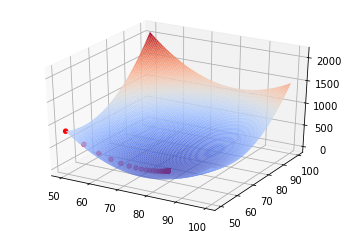

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

b1 = np.arange(50, 100, 0.5)
b2 = np.arange(50, 100, 0.5)
b11, b22 = np.meshgrid(b1, b2)
z = np.array([rec2m(y, b11, b22, x1, x2) for b11,b22 in zip(np.ravel(b11), np.ravel(b22))])
z = z.reshape(b11.shape)
ax.plot_surface(b11, b22, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.scatter(betas.T[0],betas.T[1],[rec2m(y, i[0], i[1], x1, x2) for i in betas],c='r',s=20)
#ax.view_init(-30, 20)
plt.show()

## Learning Rate

Se propone un coeficiente que se multiplica por la dirección del gradiente, corresponderáa la velocidad con la que encuentra el valor mínimo. Si es bastante grande no podrá encontrar un mínimo apropiado y si es muy pequeño puede demorarse bastante en esa busqueda.

## Regularización

Podemos adicionar una penalización de acuerdo a la complejización del modelo a la función de coste para llegar más rápido a los púntos óptimos, llamamos a ese proceso regularización. 

$$ J=MSE+\alpha\cdot C$$

donde $C$ indica la complejidad del modelo.



La regularización no solo busca los puntos óptimos sino que, al fijar un factor de la complejidad del modelo, permite minimizarla también. En ese sentido disminuimos la posibilidad de sobre ajuste y evitamos que nuestros modelos funcionen unicamente para los datos de entrenamiento.

Entre los métodos de regularización hay dos muy mencionadas, la regularizacion lasso  y la regularización Ridge, dependen del modo en que calculamos la complejidad en cada uno. También se menciona una combinación de estas dos conocida como ElasticNet, veamos como funcionan:

### Regularización Lasso

Aquí el valor de $C$ es la media absoluta de los parámetros del modelo, es decir:

$$C=\cfrac{1}{N}\sum\limits_{i=1}^N|w_i|$$


Por ejemplo,para MSE, tenemos:

$$J=\cfrac{1}{M}\sum_{i=1}^{M}(X^{\text{real}}_i-X^{\text{est}}_i)^2+\alpha \cfrac{1}{N}\sum\limits_{i=1}^N|w_i|$$

Como Lasso disminuye la complejidad directamente de los parámetros del modelo, esta regularización hará una selección de atributos. Es decir, establecerá cuales variables son irrelevantes para el modelo. Es necesario que dichas variables no esten correlaconadas para que Lasso funcione mejor.

La documentación de sklearn en este sentido es bastante interesante para ver algunos ejemplos de uso. [Sci-kit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).

### Regularización Ridge

El valor de la complejidad en este método se calcula de la siguiente manera:

$$C=\cfrac{1}{2N}\sum\limits_{i=1}^N(w_i)^2$$

Así tenemos:
$$J=\cfrac{1}{M}\sum_{i=1}^{M}(X^{\text{real}}_i-X^{\text{est}}_i)^2+\alpha \cfrac{1}{2N}\sum\limits_{i=1}^N(w_i)^2$$


Esta regularización será muy util para determinar la correlación entre variables. Ver [Scipy](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).

### Regularización ElasticNet

Finalmente, para este método combinamos las dos complejidades de la siguiente manera:

$$C=\alpha\cdot Lasso (1-\alpha)\cdot Ridge $$

y se usará para cuando tengamos muchos atributos. Permitira detectar irrelevancia y correlaciones. Ver [Scipy](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)

In [134]:
df.loc[:,'y']=25*df.loc[:,'x1']

In [135]:
y=df['y']

In [136]:
def rec2mlasso(y, b1, b2, x1, x2,a=0.1):
    y_gorro = b1*x1 + b2*x2+a*np.abs(b1)+a*np.abs(b2)
    residuos = np.square(y- y_gorro)
    return np.sum(residuos)/len(residuos)

In [137]:
def get_y_gorrolasso(b1, b2, x1, x2,a=0.1): 
    y_gorro = b1*x1 + b2*x2 + a*np.abs(b1)+a*np.abs(b2)
    return y_gorro

In [138]:

def gdlasso(x1, x2, y, lr = 0.01, iters=1000, min_perdida = 0.4,b1=2,b2=1):
    betas = np.array([[b1, b2]]) # almacenamos en un arreglo para futuro uso
    y_gorro = get_y_gorrolasso(b1, b2, x1, x2) 
    error = recm(y, y_gorro) # calculo de error
    errores = np.array([error]) # almacenamos en un arreglo para futuro uso
    for i in np.arange(iters):
        y_gorro = get_y_gorrolasso(b1, b2, x1, x2) #estimaciones
        error = recm(y, y_gorro) #error
        errores = np.append(errores , error)
        if error <= min_perdida: # condición de convergencia anticipada
            break
        else:
            # Acá es donde actualizamos nuestro modelo
            # cambiando cada beta de forma separada
            b1 = b1 - lr*grad(y, y_gorro,  x1) 
            b2 = b2 - lr*grad(y, y_gorro,  x2)
        betas = np.concatenate((betas, [[b1, b2]]), axis = 0)
    return betas, errores

In [139]:
betas_gd, errores_gd =  gdlasso(x1, x2, y, lr = 0.1, iters=100, min_perdida = 0.6)

In [140]:
print('Beta 1:', round(betas_gd[-1, 0],2))
print('Beta 2:', round(betas_gd[-1, 1],2))
print('Error final:', round(errores_gd[-1],2))

Beta 1: 25.49
Beta 2: -0.05
Error final: 6.29


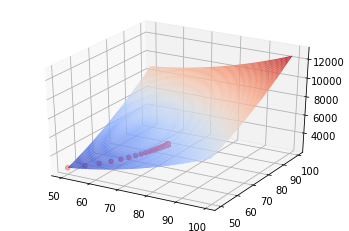

In [141]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

b1 = np.arange(50, 100, 0.5)
b2 = np.arange(50, 100, 0.5)
b11, b22 = np.meshgrid(b1, b2)
z = np.array([rec2mlasso(y, b11, b22, x1, x2) for b11,b22 in zip(np.ravel(b11), np.ravel(b22))])
z = z.reshape(b11.shape)
ax.plot_surface(b11, b22, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.scatter(betas.T[0],betas.T[1],[rec2mlasso(y, i[0], i[1], x1, x2) for i in betas],c='r',s=20)
#ax.view_init(-30, 20)
plt.show()

In [142]:
betas_gd, errores_gd =  gd(x1, x2, y, lr = 0.1, iters=100, min_perdida = 0.6)

In [143]:
print('Beta 1:', round(betas_gd[-1, 0],2))
print('Beta 2:', round(betas_gd[-1, 1],2))
print('Error final:', round(errores_gd[-1],2))

Beta 1: 24.37
Beta 2: -0.23
Error final: 0.4


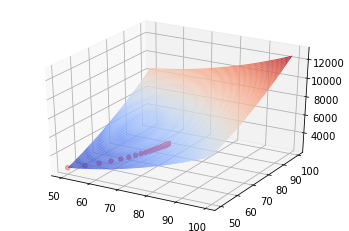

In [144]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

b1 = np.arange(50, 100, 0.5)
b2 = np.arange(50, 100, 0.5)
b11, b22 = np.meshgrid(b1, b2)
z = np.array([rec2m(y, b11, b22, x1, x2) for b11,b22 in zip(np.ravel(b11), np.ravel(b22))])
z = z.reshape(b11.shape)
ax.plot_surface(b11, b22, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.scatter(betas.T[0],betas.T[1],[rec2m(y, i[0], i[1], x1, x2) for i in betas],c='r',s=20)
#ax.view_init(-30, 20)
plt.show()